<a href="https://colab.research.google.com/github/beriaacan/Radon-Analysis-with-Deep-Learning-Algorithms/blob/main/2_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importing libraries

In [86]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [119]:
csv_folder_path = '/content/drive/My Drive/bitirme/radon_analysis_final/full_data_csv'


# Dosya adlarına göre tüm CSV dosyalarını alın
file_list = glob.glob(csv_folder_path + '/*.csv')

# Boş bir DataFrame oluşturun
df = pd.DataFrame()

# Tüm CSV dosyalarını okuyarak birleştirin
for file_ in file_list:
    # CSV dosyasını okuyun
    data_frame = pd.read_csv(file_)

    # Dosya adını alın (dosya uzantısını kaldırarak)
    file_name = os.path.basename(file_)
    file_name_without_extension = os.path.splitext(file_name)[0]

    # Dosya adını bir sütun olarak ekleyin
    data_frame['dosya_adi'] = file_name_without_extension

    # Okunan DataFrame'i birleştirme işlemi
    df = pd.concat([df, data_frame], ignore_index=True)

# Oluşturulan veri çerçevesini gösterin
df


,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,dosya_adi,tarih
0,22.8.23-15:48:9,"1,001","417,001","0,471","104,001","36,091","513,001","0,361","209,001","18,791",...,"42,251","0,441","18,541","3,081","1005,781","0,071","62,391","0,591",data_+905367791473_tel,NaN
1,22.8.23-17:39:19,"1,001","417,001","0,371","67,001","0,471","513,001","0,421","236,001","16,481",...,"42,641","0,651","17,371","0,751","1005,541","0,041","64,421","0,321",data_+905367791473_tel,NaN
2,22.8.23-18:40:31,"2,001","417,001","0,501","65,001","0,471","513,001","0,261","242,001","1,871",...,"38,731","1,121","26,781","3,741","1005,721","0,121","62,861","0,961",data_+905367791473_tel,NaN
3,22.8.23-19:41:44,"3,001","415,001","0,471","64,001","0,901","513,001","0,361","245,001","0,541",...,"35,331","0,891","33,671","1,771","1006,471","0,191","56,581","1,631",data_+905367791473_tel,NaN
4,22.8.23-20:42:56,"4,001","415,001","0,501","64,001","0,471","513,001","0,131","246,001","1,121",...,"32,511","0,651","40,511","2,201","1006,971","0,111","52,421","0,951",data_+905367791473_tel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116314,4.1.24-12:58:59,"68,001","147,001","0,751","56,001","0,471","501,001","0,501","274,001","45,211",...,"21,131","1,301","55,631","5,401","1003,431","0,281","82,051","2,391",data_+905396793312_tel,NaN
116315,4.1.24-14:0:10,"69,001","145,001","0,901","55,001","0,371","500,001","0,471","278,001","45,861",...,"22,731","0,461","46,781","1,361","1002,461","0,261","90,261","2,211",data_+905396793312_tel,NaN
116316,4.1.24-15:1:21,"70,001","144,001","0,751","55,001","0,501","501,001","0,271","272,001","45,611",...,"20,541","0,561","51,561","1,261","1001,661","0,221","96,921","1,911",data_+905396793312_tel,NaN
116317,4.1.24-16:2:33,"71,001","145,001","1,151","55,001","1,151","502,001","0,501","289,001","42,591",...,"19,301","0,191","54,541","0,661","1000,871","0,231","103,601","1,941",data_+905396793312_tel,NaN


In [120]:
# Replacing commas with periods in numerical columns
df = df.replace({',': '.'}, regex=True)

In [121]:
# Converting 'tarih' column to datetime format
df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S', errors='coerce')

In [122]:
df = df.drop(columns=df.columns[-1]) #son satır tarih olarak ekleniyor tuhaf sekilde onu sildim


In [123]:
# delete missing data
#df.dropna(inplace=True)

# Option 2: Impute missing values (e.g., with median for numerical columns)

# Son sütunun adını alın (örneğin, son sütunun adı 'son_sutun')
son_sutun_adı = df.columns[-1]

# Son sütun dışındaki tüm sayısal sütunları seçin
sayısal_sütunlar = df.select_dtypes(include=['int64', 'float64']).columns[:-1]

# Eksik değerleri doldurun
for col in sayısal_sütunlar:
    df[col].fillna(df[col].median(), inplace=True)

# Son sütunu işleme dahil etmeden veri çerçevesini gözden geçirin
df


,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,dosya_adi
0,2023-08-22 15:48:09,1.001,417.001,0.471,104.001,36.091,513.001,0.361,209.001,18.791,...,8.001,42.251,0.441,18.541,3.081,1005.781,0.071,62.391,0.591,data_+905367791473_tel
1,2023-08-22 17:39:19,1.001,417.001,0.371,67.001,0.471,513.001,0.421,236.001,16.481,...,11.001,42.641,0.651,17.371,0.751,1005.541,0.041,64.421,0.321,data_+905367791473_tel
2,2023-08-22 18:40:31,2.001,417.001,0.501,65.001,0.471,513.001,0.261,242.001,1.871,...,8.001,38.731,1.121,26.781,3.741,1005.721,0.121,62.861,0.961,data_+905367791473_tel
3,2023-08-22 19:41:44,3.001,415.001,0.471,64.001,0.901,513.001,0.361,245.001,0.541,...,12.001,35.331,0.891,33.671,1.771,1006.471,0.191,56.581,1.631,data_+905367791473_tel
4,2023-08-22 20:42:56,4.001,415.001,0.501,64.001,0.471,513.001,0.131,246.001,1.121,...,12.001,32.511,0.651,40.511,2.201,1006.971,0.111,52.421,0.951,data_+905367791473_tel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116314,2024-01-04 12:58:59,68.001,147.001,0.751,56.001,0.471,501.001,0.501,274.001,45.211,...,22.001,21.131,1.301,55.631,5.401,1003.431,0.281,82.051,2.391,data_+905396793312_tel
116315,2024-01-04 14:00:10,69.001,145.001,0.901,55.001,0.371,500.001,0.471,278.001,45.861,...,41.001,22.731,0.461,46.781,1.361,1002.461,0.261,90.261,2.211,data_+905396793312_tel
116316,2024-01-04 15:01:21,70.001,144.001,0.751,55.001,0.501,501.001,0.271,272.001,45.611,...,17.001,20.541,0.561,51.561,1.261,1001.661,0.221,96.921,1.911,data_+905396793312_tel
116317,2024-01-04 16:02:33,71.001,145.001,1.151,55.001,1.151,502.001,0.501,289.001,42.591,...,23.001,19.301,0.191,54.541,0.661,1000.871,0.231,103.601,1.941,data_+905396793312_tel


In [124]:
#check for duplication
df.duplicated().sum()


1002

In [125]:
# Tekrar eden satırları bulalım
duplicated_rows = df[df.duplicated()]
duplicated_rows

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,dosya_adi
5725,2023-09-17 17:46:42,12.001,169.001,0.751,257.001,4.451,506.001,0.001,255.001,42.511,...,6.001,29.861,0.911,42.881,1.691,1018.961,0.061,-47.459,0.531,data_+905396792427_tel
88422,2023-10-06 18:26:48,155.001,304.001,0.691,261.001,1.341,510.001,0.001,235.001,29.511,...,0.001,31.041,0.091,38.221,0.181,1006.691,0.121,54.771,1.001,data_+905396793234_tel
88841,2023-09-11 01:46:42,130.001,261.001,0.471,228.001,0.501,510.001,0.001,225.001,30.521,...,6.001,32.261,0.031,36.521,0.131,1002.141,0.081,92.931,0.661,data_+905396793234_tel
88842,2023-09-11 02:47:51,131.001,261.001,0.371,226.001,0.581,510.001,0.001,226.001,32.591,...,6.001,32.181,0.021,36.211,0.121,1001.671,0.141,96.831,1.211,data_+905396793234_tel
88843,2023-09-11 03:49:00,132.001,260.001,0.371,225.001,0.371,510.001,0.001,223.001,28.321,...,2.001,32.121,0.021,35.991,0.091,1001.391,0.041,99.171,0.291,data_+905396793234_tel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89836,2023-10-25 08:02:06,158.001,270.001,0.371,271.001,0.691,510.001,0.001,241.001,32.151,...,3.001,27.001,0.031,51.291,0.081,998.021,0.111,127.591,0.901,data_+905396793234_tel
89837,2023-10-25 09:03:14,159.001,269.001,0.471,269.001,1.071,510.001,0.001,235.001,31.571,...,2.001,26.981,0.021,51.181,0.201,998.141,0.081,126.591,0.681,data_+905396793234_tel
89838,2023-10-25 10:04:22,160.001,268.001,0.371,267.001,0.691,510.001,0.001,234.001,30.751,...,1.001,27.051,0.041,50.621,0.181,998.221,0.091,125.881,0.711,data_+905396793234_tel
89839,2023-10-25 11:05:31,161.001,268.001,0.371,267.001,0.901,510.001,0.001,236.001,32.421,...,60.001,27.441,0.121,49.591,0.511,998.071,0.111,127.121,0.961,data_+905396793234_tel


In [126]:
# Tekrar eden satırları kaldıralım
df = df.drop_duplicates()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115317 entries, 0 to 116318
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        112186 non-null  datetime64[ns]
 1   amain        115317 non-null  object        
 2   meanAM0      115317 non-null  object        
 3   stDevG1      115317 non-null  object        
 4   meanAM1      115317 non-null  object        
 5   stDevG2      115317 non-null  object        
 6   meanAM6      115317 non-null  object        
 7   stDeva6      115317 non-null  object        
 8   meanAM7      115317 non-null  object        
 9   stDeva7      115317 non-null  object        
 10  mtotal       115317 non-null  object        
 11  radon_real   115317 non-null  object        
 12  meanTemp     115317 non-null  object        
 13  stDevT       115317 non-null  object        
 14  meanHum      115317 non-null  object        
 15  stDevH       115317 non-null  obje

Bu Python fonksiyonu, bir pandas DataFrame'inin bazı temel özelliklerini incelemek için tasarlanmıştır. Fonksiyon, DataFrame'in her bir sütununu döngü içinde kontrol eder ve her sütun için şu bilgileri içeren bir liste oluşturur:


- Sütun adı (column)
- Veri tipi (dtypes)
- Aynı olmayan değer sayısı (nunique)
- Eksik değer sayısı (sum_null)

In [128]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(df)

,column,dtypes,nunique,sum_null
0,tarih,datetime64[ns],111662,3131
1,amain,object,249,0
2,meanAM0,object,436,0
3,stDevG1,object,1091,0
4,meanAM1,object,577,0
5,stDevG2,object,1543,0
6,meanAM6,object,384,0
7,stDeva6,object,3945,0
8,meanAM7,object,679,0
9,stDeva7,object,6982,0


In [ ]:
dahil_etme = ['tarih',"dosya_adi"]


for col in df.columns:
    if col not in dahil_etme:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [130]:
anomaly_check = df.describe()
anomaly_check

,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
count,1.153170e+05,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000,115317.000000
mean,1.336195e+03,180.801160,0.892721,165.106813,1.359240,479.112293,34.209362,234.763663,47.948747,64.361146,697.158826,21.977758,0.243609,59.369716,0.810622,1008.225181,0.129322,40.630137,1.007770
std,5.889310e+04,113.595348,3.159407,135.021023,13.919886,122.953048,193.922875,128.177370,199.592759,64.198396,2044.978442,6.804687,0.313506,13.298747,0.797926,17.909059,1.231570,91.091327,1.014675
min,1.001000e+00,0.001000,0.001000,0.001000,0.001000,-198.999000,0.001000,-606.999000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,-219.769000,0.001000
25%,7.001000e+00,141.001000,0.471000,85.001000,0.471000,508.001000,0.131000,218.001000,0.781000,15.001000,16.001000,17.111000,0.071000,51.591000,0.331000,1003.191000,0.061000,-20.969000,0.521000
50%,1.400100e+01,160.001000,0.501000,114.001000,0.751000,511.001000,0.361000,254.001000,7.271000,41.001000,48.001000,21.621000,0.151000,62.161000,0.551000,1010.991000,0.101000,18.821000,0.801000
75%,2.300100e+01,187.001000,0.821000,203.001000,1.211000,512.001000,0.481000,289.001000,23.041000,94.001000,151.001000,26.711000,0.301000,69.161000,0.991000,1015.771000,0.151000,84.001000,1.261000
max,3.866681e+06,831.001000,483.171000,1500.001000,4512.001000,552.001000,1213.631000,607.001000,1273.311000,255.001000,13746.001000,50.311000,39.421000,100.001000,14.891000,1039.921000,341.151000,540.071000,235.821000


In [131]:
df.radon_real.value_counts()
#her bir değerin kaç kez tekrarlandığını gösterir

0.001        3166
9.001        1775
6.001        1760
7.001        1751
8.001        1747
             ... 
4565.001        1
4332.001        1
5487.001        1
11485.001       1
2306.001        1
Name: radon_real, Length: 7215, dtype: int64

In [132]:
df.mtotal.value_counts()
#her bir değerin kaç kez tekrarlandığını gösterir

0.001      3277
9.001      1880
6.001      1879
8.001      1874
5.001      1855
           ... 
204.001     109
244.001     106
209.001     103
255.001     102
246.001     101
Name: mtotal, Length: 256, dtype: int64

 #burada hocaya sorabilirim amacım tüm datalarımda eğer bu değerlerim tek sefer varsa kesinlikle anomalidir ve uç noktayı temsil eder direkt kaldırabilirim. ama filtreleme sayım kaç olmalı? 1-2 kesinlikle anomali diye düşünüyorum şimdilik sadece 1 kere tekrar edenleri kaldıracağım (burada aslında normal datalarım da kaybolacak fakat sayısının az olduğunu ve noise ihmali gibi düşünüyorum)

In [133]:
df = df[df.radon_real.map(df.radon_real.value_counts()) > 1]
df.radon_real.value_counts()

0.001       3166
9.001       1775
6.001       1760
7.001       1751
8.001       1747
            ... 
5082.001       2
8428.001       2
2644.001       2
8257.001       2
2408.001       2
Name: radon_real, Length: 3870, dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111972 entries, 0 to 116318
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        109083 non-null  datetime64[ns]
 1   amain        111972 non-null  float64       
 2   meanAM0      111972 non-null  float64       
 3   stDevG1      111972 non-null  float64       
 4   meanAM1      111972 non-null  float64       
 5   stDevG2      111972 non-null  float64       
 6   meanAM6      111972 non-null  float64       
 7   stDeva6      111972 non-null  float64       
 8   meanAM7      111972 non-null  float64       
 9   stDeva7      111972 non-null  float64       
 10  mtotal       111972 non-null  float64       
 11  radon_real   111972 non-null  float64       
 12  meanTemp     111972 non-null  float64       
 13  stDevT       111972 non-null  float64       
 14  meanHum      111972 non-null  float64       
 15  stDevH       111972 non-null  floa

Hala bazı sorunlarım var:

- Eksik Veriler (Missing Values): 'tarih' sütununda bazı eksik değerler var (107,620 non-null değeri 110,464 girişin toplamıyla karşılaştırıldığında). Bu eksik değerleri ele almanız gerekecek. 'tarih' sütunu analiz için önemli bu yüzden, eksik tarihleri ya doldurulabilir (örneğin, önceki veya sonraki değerlerle) ya da eksik değer içeren satırları silinebilir.

- Anomali Kontrolü: Sayısal sütunlarda herhangi bir anomali (çok yüksek veya düşük değerler, standart dışı değerler vb.) olup olmadığını kontrol etmek için bazı temel istatistiksel analizler yapılabilir. Örneğin, describe() fonksiyonu kullanılarak sütunların dağılımına bakılabilir.


- Veri Görselleştirme:  Veri setinizdeki dağılımı ve potansiyel aykırı değerleri (outliers) görmek için görselleştirmeler yapılabilir. Örneğin, histogramlar veya kutu grafikleri (box plots) kullanılabilir.

- Zaman Serisi Analizi: tarih sütununun düzgün sıralı olup olmadığını ve herhangi bir tutarsızlık olup olmadığını kontrol edilebilir (zaman serisi analizi için önemli)


#Zaman Serisi Analizi

In [135]:
# Zaman Serisi Analizi için Tarih Sütununu Kontrol Etme

# 'tarih' sütununu sıralayarak zaman serisinin düzgün olduğunu kontrol edelim
df_sorted = df.sort_values(by='tarih')


In [136]:
# Tarih sıralamasının tutarlı olup olmadığını görmek için başlangıç ve bitiş tarihlerini inceleyelim
start_date = df_sorted['tarih'].min()
end_date = df_sorted['tarih'].max()

In [137]:
# Tarih sıralamasını ve başlangıç/bitiş tarihlerini gösterelim
start_date, end_date


(Timestamp('2023-08-08 11:48:59'), Timestamp('2024-01-04 17:53:14'))

In [138]:
df_sorted['tarih'].head()

103825   2023-08-08 11:48:59
103826   2023-08-08 12:50:12
31875    2023-08-08 12:53:49
103827   2023-08-08 13:51:24
31876    2023-08-08 13:55:03
Name: tarih, dtype: datetime64[ns]

In [139]:
df_sorted['tarih'].tail()

92967   NaT
92968   NaT
92969   NaT
92970   NaT
92971   NaT
Name: tarih, dtype: datetime64[ns]

In [140]:
df=df_sorted
df

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,dosya_adi
103825,2023-08-08 11:48:59,1.001,198.001,31.221,123.001,27.081,242.001,57.351,223.001,18.731,...,9.001,30.311,0.981,37.421,2.471,1007.761,0.061,45.851,0.511,data_+905396793283_tel
103826,2023-08-08 12:50:12,2.001,181.001,1.491,107.001,1.111,261.001,48.721,236.001,2.271,...,18.001,32.741,0.531,31.641,1.421,1007.821,0.041,45.271,0.361,data_+905396793283_tel
31875,2023-08-08 12:53:49,1.001,306.001,60.441,150.001,31.201,511.001,0.001,288.001,20.831,...,190.001,38.471,1.861,28.971,3.301,1005.601,0.081,63.901,0.651,data_+905396792421_tel
103827,2023-08-08 13:51:24,3.001,184.001,0.371,108.001,1.111,261.001,28.911,239.001,0.681,...,11.001,33.701,0.111,29.561,0.481,1007.821,0.051,45.321,0.401,data_+905396793283_tel
31876,2023-08-08 13:55:03,2.001,239.001,3.301,121.001,1.071,511.001,0.001,297.001,3.501,...,30.001,41.201,0.151,24.391,0.371,1005.531,0.051,64.451,0.461,data_+905396792421_tel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92967,NaT,19.001,81.001,0.471,95.001,0.941,513.001,0.361,236.001,25.711,...,28.001,21.151,0.541,52.651,0.721,1003.101,0.151,84.861,1.221,data_+905396793243_tel
92968,NaT,20.001,81.001,0.471,95.001,0.371,513.001,0.311,264.001,33.681,...,42.001,20.451,0.021,54.271,0.231,1002.231,0.381,92.171,3.231,data_+905396793243_tel
92969,NaT,21.001,81.001,0.691,95.001,0.471,513.001,0.261,288.001,21.611,...,25.001,20.741,0.171,53.791,0.551,1000.951,0.321,102.891,2.721,data_+905396793243_tel
92970,NaT,22.001,82.001,0.821,96.001,0.371,513.001,0.371,310.001,19.191,...,50.001,21.261,0.071,51.931,0.431,1000.021,0.191,110.721,1.581,data_+905396793243_tel


# Handling Missing Values in 'tarih' column


In [141]:
# First, let's check how many missing values are there in 'tarih' column
missing_values_in_tarih = df['tarih'].isnull().sum()
missing_values_in_tarih

2889

In [142]:
# There are a few strategies to handle missing values in a datetime column:
# 1. Drop rows with missing 'tarih' values
# 2. Impute missing 'tarih' values (e.g., with forward fill or backward fill)

# Method 1: Dropping rows with missing 'tarih' values
df_dropped = df.dropna(subset=['tarih'])

# Method 2: Imputing missing 'tarih' values using forward fill
df_filled_forward = df.fillna(method='ffill')

# Method 3: Imputing missing 'tarih' values using backward fill
df_filled_backward = df.fillna(method='bfill')

# Display the number of missing values before and after
missing_values_before = missing_values_in_tarih
missing_values_after_drop = df_dropped['tarih'].isnull().sum()
missing_values_after_ffill = df_filled_forward['tarih'].isnull().sum()
missing_values_after_bfill = df_filled_backward['tarih'].isnull().sum()

missing_values_before, missing_values_after_drop, missing_values_after_ffill, missing_values_after_bfill



(2889, 0, 0, 2889)

In [143]:
df=df_filled_forward

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111972 entries, 103825 to 92971
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        111972 non-null  datetime64[ns]
 1   amain        111972 non-null  float64       
 2   meanAM0      111972 non-null  float64       
 3   stDevG1      111972 non-null  float64       
 4   meanAM1      111972 non-null  float64       
 5   stDevG2      111972 non-null  float64       
 6   meanAM6      111972 non-null  float64       
 7   stDeva6      111972 non-null  float64       
 8   meanAM7      111972 non-null  float64       
 9   stDeva7      111972 non-null  float64       
 10  mtotal       111972 non-null  float64       
 11  radon_real   111972 non-null  float64       
 12  meanTemp     111972 non-null  float64       
 13  stDevT       111972 non-null  float64       
 14  meanHum      111972 non-null  float64       
 15  stDevH       111972 non-null  

#2.Anomali Kontrolü:
Örneğin: **"data_+905396793312_tel.csv"**  adlı dosyayı incelediğimizde:

Veri setinin istatistiksel özetini inceledikten sonra, potansiyel anomalileri tespit etmek için bazı gözlemler yapabiliriz:

- **Maksimum ve Minimum Değerler:**

Bazı sütunlarda maksimum veya minimum değerler diğer değerlere kıyasla oldukça farklı duruyor. Örneğin, 'meanAM0' sütununun maksimum değeri 275.001, ki bu diğer değerlerden önemli ölçüde yüksek. Benzer şekilde, 'Su_motor' sütununda -127.399 gibi negatif bir minimum değer var.

- **Standart Sapma (std):**

Eğer standart sapma çok yüksekse, bu sütunda geniş bir değer aralığı olduğunu gösterir. Örneğin, 'stDevG1', 'stDevG2', 'stDeva7', 'stDevH', 'stDevP', ve 'stDev_motor' sütunları yüksek standart sapmalara sahip, bu da bu sütunlarda geniş bir değer dağılımı olduğunu gösterir.

- **Ortalama (mean):**


Ortalama değerler, veri setinizdeki genel eğilimi gösterir. Eğer bir sütunda ortalama, minimum ve maksimum arasında büyük bir fark varsa, bu durum da dikkate alınmalıdır.

**Bu tespitler, bazı sütunlarda potansiyel anomaliler olduğunu gösteriyor olabilir. Bu anomalilerin veri setinin doğasından kaynaklanıp kaynaklanmadığını anlamak için, verileri ve bu verilerin nasıl toplandığını daha detaylı incelemek gerekebilir.**

In [145]:
# Step 4: Anomaly Detection

# To detect potential anomalies, we'll use basic statistical methods. We'll look at the summary statistics of the dataset.
# This includes checking for any values that are unusually high or low compared to the rest of the data.

anomaly_check = df.describe()

# Displaying the statistical summary of the dataset for anomaly detection
anomaly_check

,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
count,1.119720e+05,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000,111972.000000
mean,1.370832e+03,180.294368,0.867734,164.220573,1.351025,480.186412,34.718971,234.686680,48.605400,62.464964,526.603588,22.006915,0.242948,59.235783,0.809370,1008.194678,0.129397,40.831254,1.006385
std,5.975024e+04,113.754711,3.020912,135.284402,14.046312,122.984912,195.350078,128.934126,201.079516,62.905544,1715.829721,6.816720,0.314004,13.345732,0.794761,18.051416,1.249729,90.724689,1.020824
min,1.001000e+00,0.001000,0.001000,0.001000,0.001000,-198.999000,0.001000,-606.999000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,-219.769000,0.001000
25%,7.001000e+00,141.001000,0.471000,85.001000,0.471000,508.001000,0.131000,218.001000,0.761000,14.001000,15.001000,17.121000,0.071000,51.381000,0.331000,1003.121000,0.061000,-20.769000,0.521000
50%,1.400100e+01,160.001000,0.501000,113.001000,0.751000,511.001000,0.361000,254.001000,7.371000,39.001000,45.001000,21.651000,0.151000,62.011000,0.551000,1010.926000,0.101000,19.336000,0.801000
75%,2.200100e+01,186.001000,0.821000,196.001000,1.211000,512.001000,0.481000,288.001000,23.541000,90.001000,131.001000,26.761000,0.301000,69.121000,0.991000,1015.751000,0.151000,84.606000,1.261000
max,3.866681e+06,831.001000,483.171000,1500.001000,4512.001000,552.001000,1213.631000,607.001000,1273.311000,255.001000,13602.001000,50.311000,39.421000,100.001000,14.891000,1039.921000,341.151000,539.161000,235.821000


Aykırı Değerlerin İncelenmesi ve Veri Görselleştirme

We will use box plots to visualize the distribution and identify outliers in the dataset.

Box plots are excellent for spotting outliers and understanding the distribution of data.

Box plotlar, seçtiğimiz sütunlardaki veri dağılımını ve potansiyel aykırı değerleri göstermektedir. Her bir box plot, bir sütundaki değerlerin dağılımını temsil eder ve şu özelliklere sahiptir:

- Kutunun merkezi çizgisi, medyanı (ortanca değeri) gösterir.
- Kutunun alt ve üst sınırları, alt ve üst çeyreklikleri (Q1 ve Q3) temsil eder. Bu, verilerin orta %50'sini gösterir.
- "Bıyıklar", kutunun dışında kalan değerleri gösterir ve genellikle Q1 ve Q3'ten 1.5x IQR (interquartile range, çeyrekler arası aralık) mesafede olan değerlere kadar uzanır.
- Kutunun dışında kalan noktalar, potansiyel aykırı değerler olarak kabul edilir.

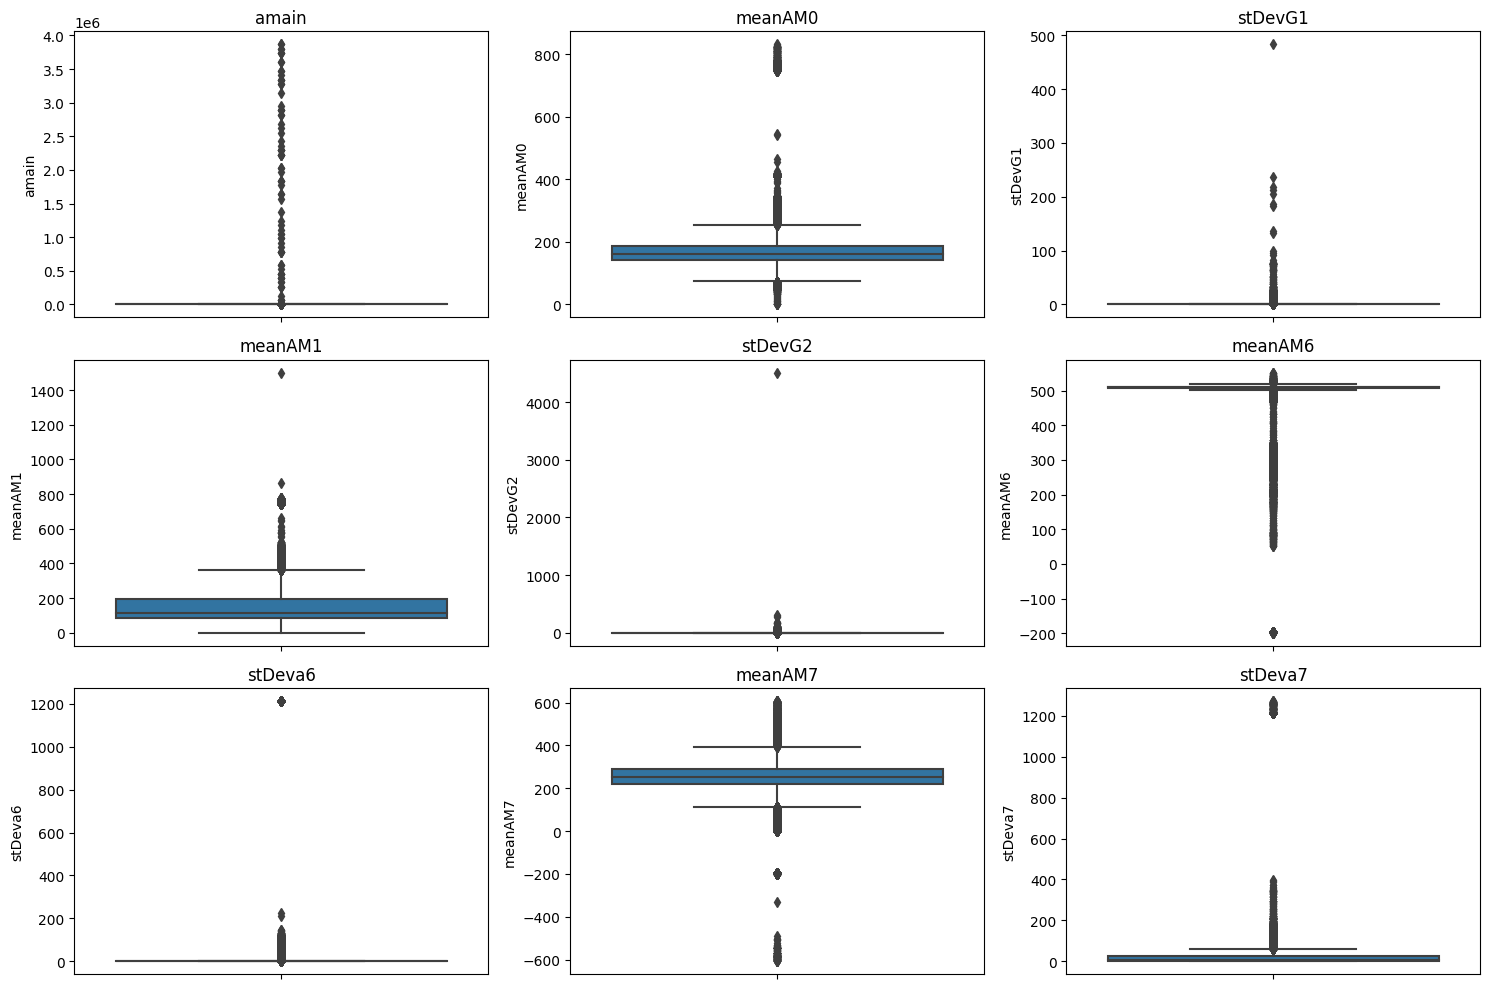

In [146]:
# Selecting a subset of columns for visualization to keep the plots readable
columns_to_plot = df.columns[1:10]  # Adjust this to visualize different columns

# Plotting box plots for selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size according to the number of columns
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Burada yapılacak yorumlar şunlar olabilir:

1. **'amain' Sütunu**: Çok büyük aykırı değerler görülüyor, bu da veri setinde bazı değerlerin diğerlerinden çok daha büyük olduğunu gösteriyor. Bu değerlerin veri giriş hataları olup olmadığını kontrol etmek önemli olabilir.

2. **'meanAM0', 'stDevG2', 'meanAM6', 'stDeva6', 'meanAM7', 'stDeva7' Sütunları**: Bu sütunlarda da birkaç büyük aykırı değer bulunuyor. Ancak 'amain' sütununa göre daha az sayıda ve daha küçük ölçekte.

3. **Genel Gözlem**: Bazı sütunlarda aykırı değerlerin sayısı oldukça fazla görünüyor. Bu durum, ya bu değerlerin veri toplama sürecindeki doğal varyasyonlardan kaynaklandığını ya da veri setinde potansiyel hatalar veya tutarsızlıklar olduğunu düşündürebilir.

4. **Değer Aralıkları**: 'meanAM1', 'stDevG1' gibi sütunlarda geniş değer aralıkları var, bu da bu sütunlardaki verilerin geniş bir dağılıma sahip olduğunu gösteriyor.

Bu çıkarımlar, veri setini daha derinlemesine analiz etmeniz ve bu aykırı değerlerin veri setinin doğası mı yoksa veri kalitesi sorunları mı olduğunu belirlemek gerektiğini gösteriyor. Örneğin, bu aykırı değerlerin bazıları veri toplama sırasında meydana gelen geçici hatalardan kaynaklanıyor olabilir veya gerçek ve geçerli ölçümler olabilir. Aykırı değerleri doğru bir şekilde ele almak için, bu değerlerin kaynağını ve veri setinizdeki rolünü anlamak önemlidir.


burada daha fazla işlem yapmanın verilerimi eksilteceğini düşündüğüm için devam etmedim çünkü yalnızca mean vs ile anomali elemek yanlış bir hareket olurdu.

In [147]:
df

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,dosya_adi
103825,2023-08-08 11:48:59,1.001,198.001,31.221,123.001,27.081,242.001,57.351,223.001,18.731,...,9.001,30.311,0.981,37.421,2.471,1007.761,0.061,45.851,0.511,data_+905396793283_tel
103826,2023-08-08 12:50:12,2.001,181.001,1.491,107.001,1.111,261.001,48.721,236.001,2.271,...,18.001,32.741,0.531,31.641,1.421,1007.821,0.041,45.271,0.361,data_+905396793283_tel
31875,2023-08-08 12:53:49,1.001,306.001,60.441,150.001,31.201,511.001,0.001,288.001,20.831,...,190.001,38.471,1.861,28.971,3.301,1005.601,0.081,63.901,0.651,data_+905396792421_tel
103827,2023-08-08 13:51:24,3.001,184.001,0.371,108.001,1.111,261.001,28.911,239.001,0.681,...,11.001,33.701,0.111,29.561,0.481,1007.821,0.051,45.321,0.401,data_+905396793283_tel
31876,2023-08-08 13:55:03,2.001,239.001,3.301,121.001,1.071,511.001,0.001,297.001,3.501,...,30.001,41.201,0.151,24.391,0.371,1005.531,0.051,64.451,0.461,data_+905396792421_tel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92967,2024-01-04 17:53:14,19.001,81.001,0.471,95.001,0.941,513.001,0.361,236.001,25.711,...,28.001,21.151,0.541,52.651,0.721,1003.101,0.151,84.861,1.221,data_+905396793243_tel
92968,2024-01-04 17:53:14,20.001,81.001,0.471,95.001,0.371,513.001,0.311,264.001,33.681,...,42.001,20.451,0.021,54.271,0.231,1002.231,0.381,92.171,3.231,data_+905396793243_tel
92969,2024-01-04 17:53:14,21.001,81.001,0.691,95.001,0.471,513.001,0.261,288.001,21.611,...,25.001,20.741,0.171,53.791,0.551,1000.951,0.321,102.891,2.721,data_+905396793243_tel
92970,2024-01-04 17:53:14,22.001,82.001,0.821,96.001,0.371,513.001,0.371,310.001,19.191,...,50.001,21.261,0.071,51.931,0.431,1000.021,0.191,110.721,1.581,data_+905396793243_tel


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111972 entries, 103825 to 92971
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        111972 non-null  datetime64[ns]
 1   amain        111972 non-null  float64       
 2   meanAM0      111972 non-null  float64       
 3   stDevG1      111972 non-null  float64       
 4   meanAM1      111972 non-null  float64       
 5   stDevG2      111972 non-null  float64       
 6   meanAM6      111972 non-null  float64       
 7   stDeva6      111972 non-null  float64       
 8   meanAM7      111972 non-null  float64       
 9   stDeva7      111972 non-null  float64       
 10  mtotal       111972 non-null  float64       
 11  radon_real   111972 non-null  float64       
 12  meanTemp     111972 non-null  float64       
 13  stDevT       111972 non-null  float64       
 14  meanHum      111972 non-null  float64       
 15  stDevH       111972 non-null  

tüm verilerim aynı boyutta artık işlem yapabileceğim aşamaya geçebilirim.

#güncel haliyle save ediyorum cvs dosyalarimi

In [149]:
# Create a directory to store CSV files
csv_folder_path = '/content/drive/My Drive/bitirme/radon_analysis_final/final_full_data_csv'
os.makedirs(csv_folder_path, exist_ok=True)


In [151]:
unique_file_names = df['dosya_adi'].unique()

saved_files = {}

for file_name in unique_file_names:
    # Filter the DataFrame for each unique 'dosya_adi'
    df_filtered = df[df['dosya_adi'] == file_name]

    # Create a new file name
    new_file_name = f"final_{file_name}.csv"
    csv_file_path = os.path.join(csv_folder_path, new_file_name)

    # Save the filtered DataFrame to CSV
    df_filtered.to_csv(csv_file_path, index=False)

    # Add the new file path to the saved_files dictionary
    saved_files[new_file_name] = csv_file_path

# Displaying the saved files' names
list(saved_files.keys())


['final_data_+905396793283_tel.csv',
 'final_data_+905396792421_tel.csv',
 'final_data_+905396793276_tel.csv',
 'final_data_+905396793291_tel.csv',
 'final_data_+905396793234_tel.csv',
 'final_data_+905396792336_tel.csv',
 'final_data_+905396793157_tel.csv',
 'final_data_+905396793196_tel.csv',
 'final_data_+905396793223_tel.csv',
 'final_data_+905396793221_tel.csv',
 'final_data_+905396793292_tel.csv',
 'final_data_+905396792427_tel.csv',
 'final_data_+905396792381_tel.csv',
 'final_data_+905396793194_tel.csv',
 'final_data_+905396792434_tel.csv',
 'final_data_+905396792448_tel.csv',
 'final_data_+905367791473_tel.csv',
 'final_data_+905396792392_tel.csv',
 'final_data_+905396792487_tel.csv',
 'final_data_+905396792435_tel.csv',
 'final_data_+905396793193_tel.csv',
 'final_data_+905396792349_tel.csv',
 'final_data_+905396792491_tel.csv',
 'final_data_+905396792291_tel.csv',
 'final_data_+905396792925_tel.csv',
 'final_data_+905396792846_tel.csv',
 'final_data_+905396792354_tel.csv',
 

In [152]:
len(saved_files.keys())

40

40adet dedektör ile işleme başlamıştım data temizliği sonrası yine 40 adet dedektör oluştu.